<a href="https://colab.research.google.com/github/littlecanargie/EpidemicModeling/blob/main/Copy_of_20210126_Practice_1_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machinery (takes some time)

## Base packages

In [3]:
libraries = c("dplyr", "magrittr", "tidyr", "ggplot2", "readxl")  
for(x in libraries) { library(x, character.only=TRUE, warn.conflicts=FALSE, quietly=TRUE) }

install.packages("zoo"); library("zoo")

R.Version()$version.string

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[1] "R version 4.0.3 (2020-10-10)"

In [4]:
# Data hub for COVID19 datasets
## install the package
install.packages("COVID19")
## load the package
library("COVID19")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Stan

In [5]:
# Step 1: install CmdStanR and only the packages that it directly depends on.
install.packages('versions')
library(versions)
# Install package CmdStanR from GitHub
library(devtools)
if(!require(cmdstanr)){
  devtools::install_github("stan-dev/cmdstanr", dependencies=c("Depends", "Imports"))
  library(cmdstanr)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis

Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



posterior  (NA -> 2c0a2f111...) [GitHub]
checkmate  (NA -> 2.0.0       ) [CRAN]
abind      (NA -> 1.4-5       ) [CRAN]
data.table (NA -> 1.13.6      ) [CRAN]


checkmate (NA -> 2.0.0) [CRAN]
abind     (NA -> 1.4-5) [CRAN]


Installing 2 packages: checkmate, abind

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpxB5Qx4/remotes3d64576639/stan-dev-posterior-2c0a2f1/DESCRIPTION’
─  preparing ‘posterior’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘posterior_0.1.3.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 3 packages: checkmate, abind, data.table

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'posterior' from a github remote, the SHA1 (2c0a2f11) has not changed since last install.
  Use `force = TRUE` to force installation



✔  checking for file ‘/tmp/RtmpxB5Qx4/remotes3d66425675/stan-dev-cmdstanr-9bc4cb4/DESCRIPTION’
─  preparing ‘cmdstanr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘cmdstanr_0.3.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.3.0.9000

- Online documentation and vignettes at mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



In [6]:
# Step 2: download and untar the CmdStan binary for Google Colab instances
## Install CmdStan binaries
if (!file.exists("cmdstan-2.23.0.tgz")) {
  system("wget https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz", intern=T)
  system("tar zxf colab-cmdstan-2.23.0.tar.gz", intern=T)
}
list.files("cmdstan-2.23.0")

character(0)

[1] "bin"                "examples"           "install-tbb.bat"   
 [4] "Jenkinsfile"        "lib"                "LICENSE"           
 [7] "make"               "makefile"           "README.md"         
[10] "runCmdStanTests.py" "src"                "stan"              
[13] "test-all.sh"

In [7]:
# Step 3: Register the CmdStan install location
## Set cmdstan_path to CmdStan installation
set_cmdstan_path("cmdstan-2.23.0")
## helper function
print_file <- function(file, nlines=-1L) {
  cat(paste(readLines(file, n=nlines), "\n", sep=""), sep="")
}

CmdStan path set to: /content/cmdstan-2.23.0



In [8]:
# will be used for postprocessing
if (!require("devtools")) {
  install.packages("devtools")
}
devtools::install_github("stan-dev/bayesplot")

library(posterior)
library(bayesplot)

brio     (1.1.0 -> 1.1.1) [CRAN]
plyr     (NA    -> 1.8.6) [CRAN]
reshape2 (NA    -> 1.4.4) [CRAN]
ggridges (NA    -> 0.5.3) [CRAN]


Installing 4 packages: brio, plyr, reshape2, ggridges

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpxB5Qx4/remotes3d6191c7be/stan-dev-bayesplot-665c687/DESCRIPTION’
─  preparing ‘bayesplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘bayesplot_1.8.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is posterior version 0.1.3

This is bayesplot version 1.8.0.9000

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting


Attaching package: ‘bayesplot’


The following object is masked from ‘package:posterior’:

    rhat




## Templates for Stan which will be used later

In [9]:
covid19(verbose = T)

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

  Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open
  Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

  @Article{,
    title = {COVID-19 Data Hub},
    year = {2020},
    doi = {10.21105/joss.02376},
    author = {Emanuele Guidotti and David Ardia},
    journal = {Journal of Open Source Software},
    volume = {5},
    number = {51},
    pages = {2376},
  }

To retrieve citation and metadata of the data sources see ?covid19cite. To hide this message use 'verbose = FALSE'.


id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,⋯,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
<chr>,<date>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
AFG,2020-01-22,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-23,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-24,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-25,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-26,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-27,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-28,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-29,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-30,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF


In [10]:
df = covid19("Japan", level = 2, verbose = F)

In [11]:
df %>% 
  filter(administrative_area_level_2 == "Kyoto") %>%
  select(date, confirmed, deaths) -> df2

Adding missing grouping variables: `id`



In [12]:
df2 %>% 
  filter(confirmed > 0) %>%
  head(1) %>%
  .$date -> mindate
mindate

[1] "2020-01-30"

In [13]:
df2 %>% filter(date >= mindate - 1) %>% mutate(across(c("confirmed", "deaths"), ~(.-lag(.)))) %>% ungroup %>% select(-id) %>%
  filter(date >= mindate) %>% 
  mutate(confirmed_rol_ave = zoo::rollapply(confirmed, 7, mean, align = "right", fill = 0)) -> Df
Df %>% tail

date,confirmed,deaths,confirmed_rol_ave
<date>,<dbl>,<int>,<dbl>
2021-01-20,123,1,131.5714
2021-01-21,140,3,132.8571
2021-01-22,130,4,134.2857
2021-01-23,121,5,131.5714
2021-01-24,115,2,126.0000
2021-01-25,0,0,110.2857


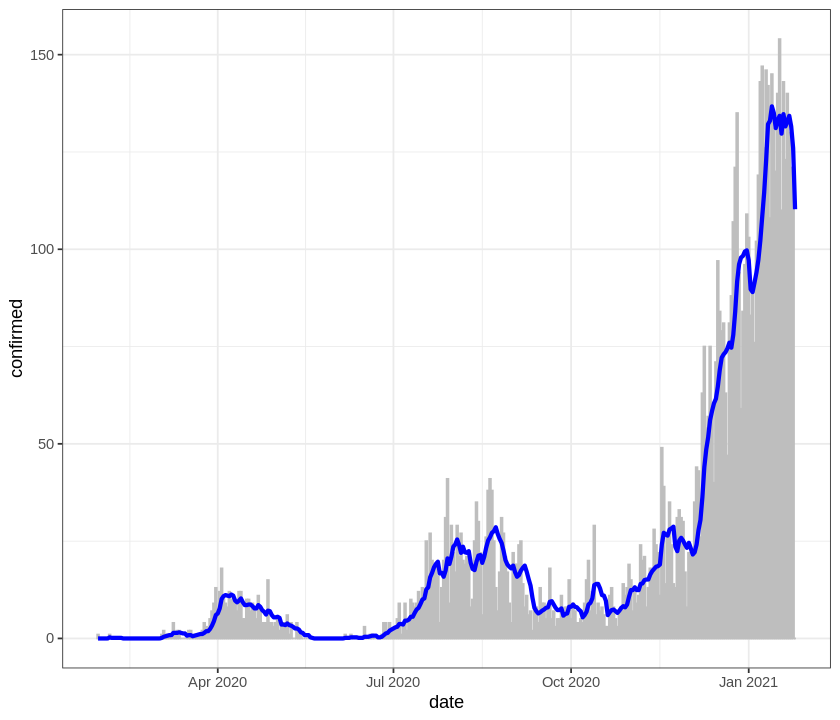

In [14]:
options(repr.width = 12, repr.plot.height = 6)
Df %>% ggplot(aes(x = date, y = confirmed)) + geom_bar(stat = "identity", color = "grey", fill = "grey") + theme_bw() +
  geom_line(aes(y = confirmed_rol_ave), color = "blue", size = 1.2) 

In [34]:
# Stan program
stan_code = "functions {
    /* calculating the convolutions */
    // X: first function, Yrev: reversed version of the second function
    // K: length of X and Yrev
    // the result is the vector of length K-1, because the first element equal zero is omitted
    vector convolution(vector X, vector Yrev, int K) {
        vector[K-1] res;
        res[1] = X[1] * Yrev[K]; // Stan cannot do dot product of vectors with length 1?
        for (k in 2:K-1) 
            res[k] = dot_product(head(X, k), tail(Yrev, k)); // by definition of the convolution
        return res;        
    }
}

data {
  int<lower = 1> K; // number of days
  int<lower = 0> cases[K]; // number of cases for each day
  
  // Weibull parameters for serial interval
  real<lower = 0> param1_SI;
  real<lower = 0> param2_SI;
}

transformed data {
  vector[K-1] conv;
  {
    vector[K] gt_cdf;
    vector[K] gt;
    vector[K] gt_rev;

    for(i in 1:K)
      gt_cdf[i] = exp(weibull_lcdf(i | param1_SI, param2_SI)); // The pdf and cdf in Stan is in log form as default

    gt = append_row(gt_cdf[1], gt_cdf[2:K] - gt_cdf[1:K-1]);

    for(i in 1:K)
      gt_rev[i] = gt[K + 1 - i];

    conv = convolution(to_vector(cases), gt_rev, K);
  }
}

parameters {
  vector<lower = 0>[K-1] Rt;
}

model {
  Rt ~ normal(2.4, 2.0);

  tail(cases, K - 1) ~ poisson(Rt .* conv + 1e-8);
}"
stan_file = write_stan_file(stan_code)

# data file
data_list = list(param1_SI = 2.305, param2_SI = 5.452, K = nrow(Df), cases = Df$confirmed_rol_ave)
data_file = tempfile(fileext = ".json")
write_stan_json(data_list, data_file)

# # Compile example model
mod = cmdstan_model(stan_file)

# # Condition on data
fit <- mod$sample(data = data_file, iter_sampling=1000, iter_warmup=500, chains=3) #, seed=123

# # Print a summary of the posterior sample
options(digits = 2)
fit$summary()

output = fit$summary(c("Rt"), ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame
names(output) = c("variable", "median", "lower", "upper")
output %>% head

out = stringr::str_match_all(output$variable, "[\\d+(.*)]")
output$index = sapply(out, function(x) paste(x[,1],collapse=""))
output %<>% mutate(variable = stringr::str_extract(variable, "^[^\\[]+")) %>% select(variable, index, everything())
output %>% head

Compiling Stan program...



Syntax error in '/tmp/RtmpxB5Qx4/model-3d2707d19.stan', line 16, column 2 to column 19, parsing error:

   -------------------------------------------------

    14:  

    15:  data {

    16:    int<lower = 1> K; // number of days

                            ^

    17:    double<lower = 0> cases[K]; // number of cases for each day

    18:    

   -------------------------------------------------



Only top-level variable declarations allowed in data and parameters blocks.







ERROR: ignored

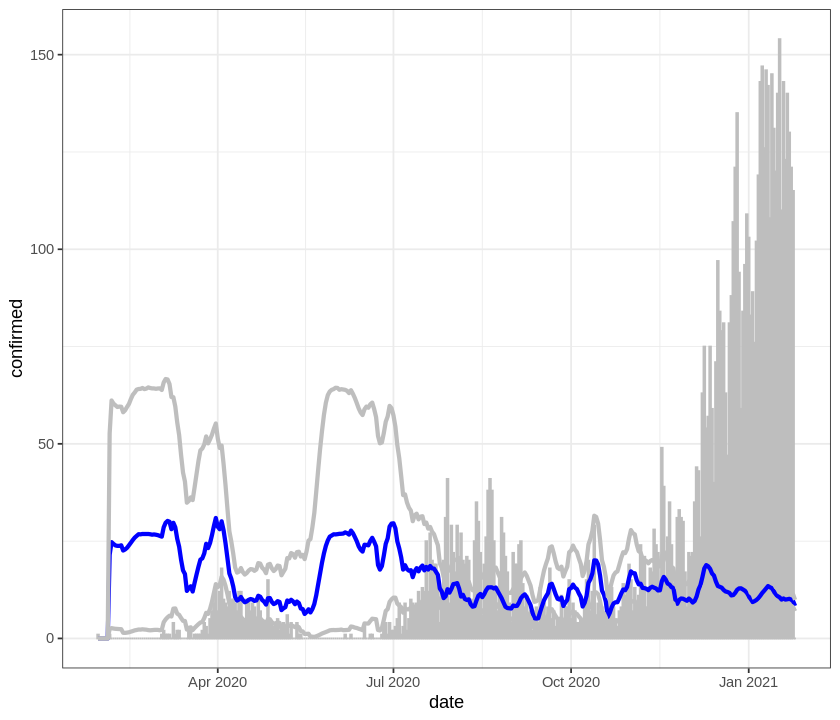

In [43]:
options(repr.width = 12, repr.plot.height = 6)
Df %>% ggplot(aes(x = date, y = confirmed)) + geom_bar(stat = "identity", color = "grey", fill = "grey") + theme_bw() +
  geom_line(aes(y = zoo::rollapply(c(0,output$median)*10, 7, mean, align = "right", fill = 0)), color = "blue", size = 1.2) +
  geom_line(aes(y = zoo::rollapply(c(0,output$lower)*10, 7, mean, align = "right", fill = 0)), color = "grey", size = 1.2) +
  geom_line(aes(y = zoo::rollapply(c(0,output$upper)*10, 7, mean, align = "right", fill = 0)), color = "grey", size = 1.2)

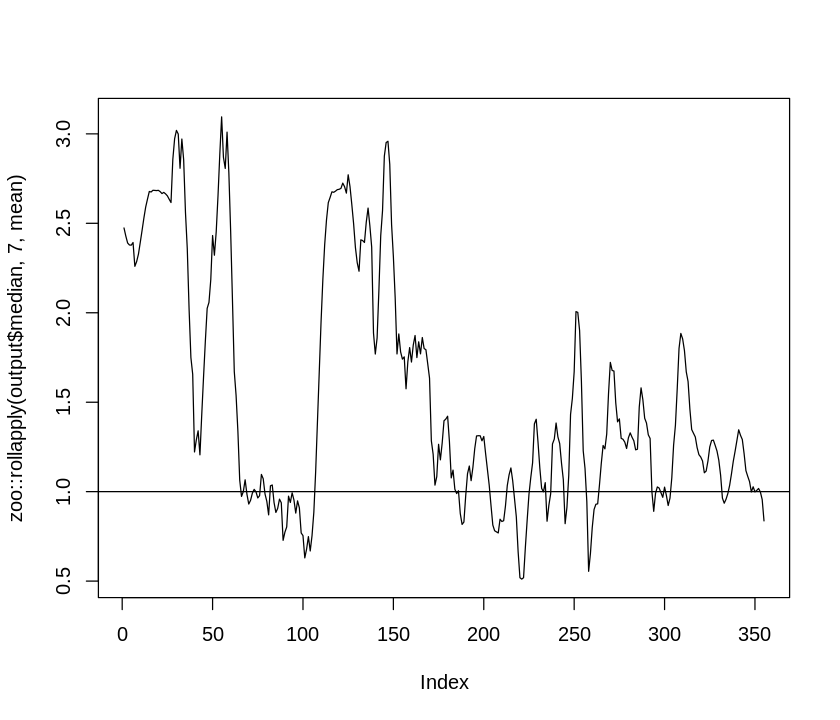

In [46]:
plot(zoo::rollapply(output$median, 7, mean), type = "l")
abline(h = 1)